In [27]:
import pandas as pd

In [28]:
df=pd.read_csv('HEROMOTOCO.csv')

In [29]:
df.head()

,Unnamed: 0,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0,1996-01-01,HEROHONDA,EQ,229.00,229.0,226.25,226.25,NaN,226.25,226.25,50,1.131250e+09,NaN,NaN,NaN
1,1,1996-01-02,HEROHONDA,EQ,226.25,230.0,239.95,224.00,NaN,224.50,227.10,500,1.135500e+10,NaN,NaN,NaN
2,2,1996-01-03,HEROHONDA,EQ,224.50,225.0,227.00,224.00,NaN,224.00,225.95,500,1.129750e+10,NaN,NaN,NaN
3,3,1996-01-04,HEROHONDA,EQ,224.00,236.0,236.00,222.00,NaN,226.00,226.66,2200,4.986500e+10,NaN,NaN,NaN
4,4,1996-01-05,HEROHONDA,EQ,226.00,226.0,228.50,224.00,NaN,227.85,227.28,300,6.818250e+09,NaN,NaN,NaN


In [30]:
df.tail()

,Unnamed: 0,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
6343,6343,2021-06-25,HEROMOTOCO,EQ,2906.95,2908.00,2949.30,2901.95,2941.45,2939.20,2933.79,631005,1.851237e+14,63198.0,311933.0,0.4943
6344,6344,2021-06-28,HEROMOTOCO,EQ,2939.20,2957.00,2958.40,2929.40,2946.75,2943.65,2941.90,407079,1.197586e+14,31031.0,229081.0,0.5627
6345,6345,2021-06-29,HEROMOTOCO,EQ,2943.65,2943.65,2957.55,2915.00,2930.00,2927.50,2935.42,470337,1.380637e+14,42559.0,286711.0,0.6096
6346,6346,2021-06-30,HEROMOTOCO,EQ,2927.50,2925.00,2930.00,2897.40,2905.00,2902.60,2913.67,758083,2.208805e+14,46044.0,491402.0,0.6482
6347,6347,2021-07-01,HEROMOTOCO,EQ,2902.60,2905.00,2947.00,2905.00,2928.00,2922.50,2928.57,634751,1.858910e+14,31961.0,239067.0,0.3766


In [31]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High',
       'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades',
       'Deliverable Volume', '%Deliverble'],
      dtype='object')


In [32]:
df1=df.reset_index()['Close']
df1

0        226.25
1        224.50
2        224.00
3        226.00
4        227.85
         ...   
6343    2939.20
6344    2943.65
6345    2927.50
6346    2902.60
6347    2922.50
Name: Close, Length: 6348, dtype: float64

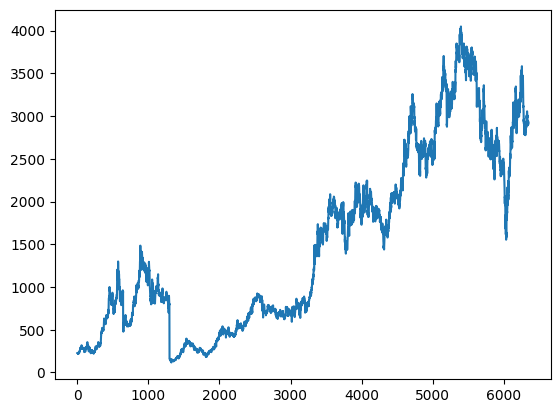

In [33]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [34]:
import numpy as np

In [35]:
df1

0        226.25
1        224.50
2        224.00
3        226.00
4        227.85
         ...   
6343    2939.20
6344    2943.65
6345    2927.50
6346    2902.60
6347    2922.50
Name: Close, Length: 6348, dtype: float64

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
print(df1)

[[0.02787173]
 [0.0274267 ]
 [0.02729954]
 ...
 [0.71481067]
 [0.7084785 ]
 [0.71353915]]


In [38]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [39]:
training_size,test_size

(4126, 2222)

In [40]:
train_data

array([[0.02787173],
       [0.0274267 ],
       [0.02729954],
       ...,
       [0.50821402],
       [0.50975256],
       [0.49980927]])

In [41]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [42]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
print(X_train.shape), print(y_train.shape)

(4025, 100)
(4025,)


(None, None)

In [44]:
print(X_test.shape), print(ytest.shape)

(2121, 100)
(2121,)


(None, None)

In [45]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
63/63 [==============================] - 10s 122ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 2/100
63/63 [==============================] - 7s 118ms/step - loss: 3.5835e-04 - val_loss: 0.0028
Epoch 3/100
63/63 [==============================] - 8s 122ms/step - loss: 3.3741e-04 - val_loss: 0.0023
Epoch 4/100
63/63 [==============================] - 8s 122ms/step - loss: 3.4825e-04 - val_loss: 0.0027
Epoch 5/100
63/63 [==============================] - 8s 124ms/step - loss: 3.3779e-04 - val_loss: 0.0015
Epoch 6/100
63/63 [==============================] - 8s 125ms/step - loss: 3.0975e-04 - val_loss: 0.0025
Epoch 7/100
63/63 [==============================] - 8s 128ms/step - loss: 2.7141e-04 - val_loss: 0.0013
Epoch 8/100
63/63 [==============================] - 8s 129ms/step - loss: 2.4739e-04 - val_loss: 0.0023
Epoch 9/100
63/63 [==============================] - 8s 131ms/step - loss: 2.5156e-04 - val_loss: 8.8308e-04
Epoch 10/100
63/63 [==============================] - 

63/63 [==============================] - 9s 142ms/step - loss: 5.6142e-05 - val_loss: 1.7830e-04
Epoch 77/100
63/63 [==============================] - 9s 141ms/step - loss: 5.6608e-05 - val_loss: 2.6547e-04
Epoch 78/100
63/63 [==============================] - 9s 145ms/step - loss: 5.3328e-05 - val_loss: 2.6918e-04
Epoch 79/100
63/63 [==============================] - 9s 148ms/step - loss: 5.5935e-05 - val_loss: 4.9182e-04
Epoch 80/100
63/63 [==============================] - 9s 149ms/step - loss: 5.8984e-05 - val_loss: 1.7874e-04
Epoch 81/100
63/63 [==============================] - 207s 3s/step - loss: 5.2865e-05 - val_loss: 2.4809e-04
Epoch 82/100
63/63 [==============================] - 9s 144ms/step - loss: 5.3146e-05 - val_loss: 2.4184e-04
Epoch 83/100
63/63 [==============================] - 9s 143ms/step - loss: 5.4289e-05 - val_loss: 2.3863e-04
Epoch 84/100
63/63 [==============================] - 9s 146ms/step - loss: 5.7435e-05 - val_loss: 2.0559e-04
Epoch 85/100
63/63 [====

In [51]:
import tensorflow as tf

In [52]:
tf.__version__

'2.13.0'

In [53]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

67/67 [==============================] - 1s 18ms/step


In [54]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1031.6181763408931

In [56]:
math.sqrt(mean_squared_error(ytest,test_predict))

2849.3080213685207

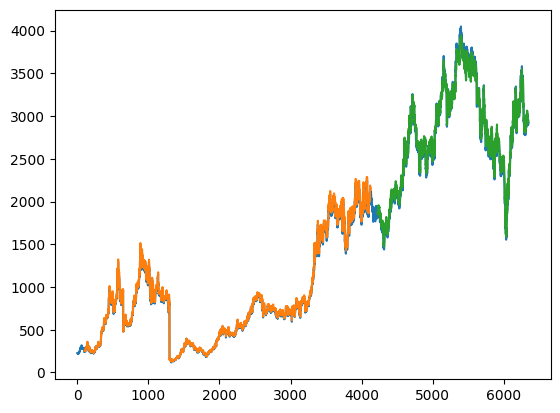

In [57]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [129]:
len(test_data)

2222

In [130]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 1881)

In [131]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [132]:
temp_input

[0.47811713246700416,
 0.47275131602370124,
 0.4856445337334385,
 0.4906288940314829,
 0.492142003407675,
 0.4940111385194417,
 0.4924090227093558,
 0.49516822216005907,
 0.49176054726241647,
 0.48700506065152716,
 0.4917859776721004,
 0.5031279403911197,
 0.5102738855122956,
 0.5298171553543729,
 0.5203316125422781,
 0.5105790504285025,
 0.4944434554840679,
 0.48998041858454344,
 0.49290491569819195,
 0.5104773287897669,
 0.5001780128677874,
 0.5118124252981716,
 0.520369758156804,
 0.5121811662385881,
 0.5038654222719529,
 0.5011189380260916,
 0.49629987539099263,
 0.4980927192737076,
 0.500775627495359,
 0.49942781578211237,
 0.5046410497673118,
 0.496465173053938,
 0.49649060346362184,
 0.4953843806423722,
 0.49631259059583466,
 0.48888691096813575,
 0.48835287236477387,
 0.48840373318414165,
 0.4976349718993973,
 0.49843602980444024,
 0.49820715611728517,
 0.5008137731098848,
 0.49624901457162485,
 0.49417643618238694,
 0.4925743203723012,
 0.4882638659308802,
 0.4832032144037841,

In [133]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=1880
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
        print()
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.47275132 0.48564453 0.49062889 ... 0.71481067 0.7084785  0.71353915]
0 day output [[0.72085893]]

1 day input [0.48564453 0.49062889 0.492142   ... 0.7084785  0.71353915 0.72085893]
1 day output [[0.72628367]]

2 day input [0.49062889 0.492142   0.49401114 ... 0.71353915 0.72085893 0.72628367]
2 day output [[0.7301611]]

3 day input [0.492142   0.49401114 0.49240902 ... 0.72085893 0.72628367 0.73016107]
3 day output [[0.7337221]]

4 day input [0.49401114 0.49240902 0.49516822 ... 0.72628367 0.73016107 0.73372209]
4 day output [[0.7374059]]

5 day input [0.49240902 0.49516822 0.49176055 ... 0.73016107 0.73372209 0.7374059 ]
5 day output [[0.7411326]]

6 day input [0.49516822 0.49176055 0.48700506 ... 0.73372209 0.7374059  0.74113262]
6 day output [[0.7447469]]

7 day input [0.49176055 0.48700506 0.49178598 ... 0.7374059  0.74113262 0.74474692]
7 day output [[0.74816334]]

8 day input [0.48700506 0.49178598 0.50312794 ... 0.74113262 0.74474692 0.74816334]
8 day output [[0.

In [134]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [135]:
import matplotlib.pyplot as plt

In [136]:
len(df1)

6348

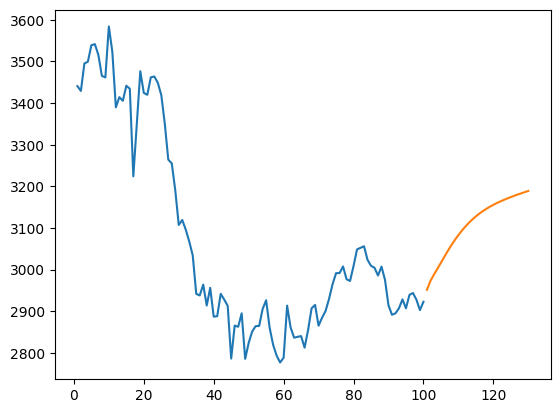

In [137]:
plt.plot(day_new,scaler.inverse_transform(df1[6248:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [138]:
len(df3)

6378

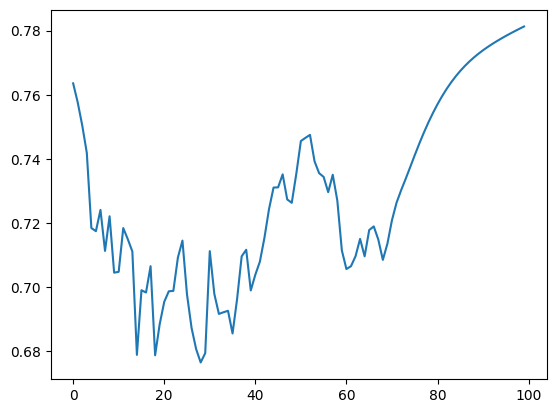

In [139]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6278:])

In [140]:
df3=scaler.inverse_transform(df3).tolist()

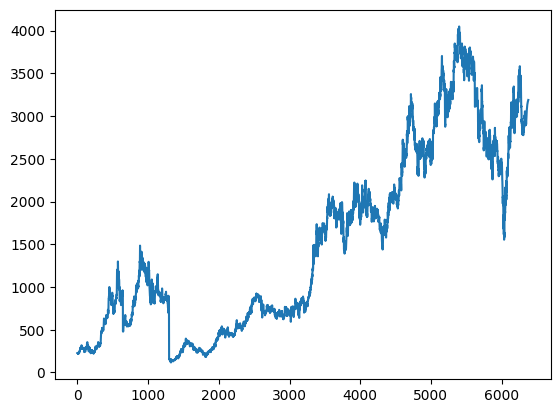

In [141]:
plt.plot(df3)